In [1]:
#Assignment 12 :Random Forest

In [ ]:
#1. Exploratory Data Analysis (EDA):

#Perform exploratory data analysis to understand the structure of the dataset.
#Check for missing values, outliers, inconsistencies in the data.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("glass.csv")

In [4]:
# First & last few rows
print(df.head())
print(df.tail())

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0   1.0
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0   1.0
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0   1.0
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0   1.0
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0   1.0
     RI  Na  Mg  Al  Si   K  Ca  Ba  Fe  Type
994 NaN NaN NaN NaN NaN NaN NaN NaN NaN   NaN
995 NaN NaN NaN NaN NaN NaN NaN NaN NaN   NaN
996 NaN NaN NaN NaN NaN NaN NaN NaN NaN   NaN
997 NaN NaN NaN NaN NaN NaN NaN NaN NaN   NaN
998 NaN NaN NaN NaN NaN NaN NaN NaN NaN   NaN


In [5]:
# Shape of dataset
print("Shape:", df.shape)

Shape: (999, 10)


In [6]:
# Data types & non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    float64
dtypes: float64(10)
memory usage: 78.2 KB


In [7]:
# Summary statistics
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [8]:
#Check for Missing Values
# Missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 RI      785
Na      785
Mg      785
Al      785
Si      785
K       785
Ca      785
Ba      785
Fe      785
Type    785
dtype: int64


In [9]:
# Percentage missing per column
print((df.isnull().mean() * 100).round(2))

RI      78.58
Na      78.58
Mg      78.58
Al      78.58
Si      78.58
K       78.58
Ca      78.58
Ba      78.58
Fe      78.58
Type    78.58
dtype: float64


In [ ]:
#Detect Outliers
#Outliers can be detected using:
# Boxplots
# Z-score
# IQR method

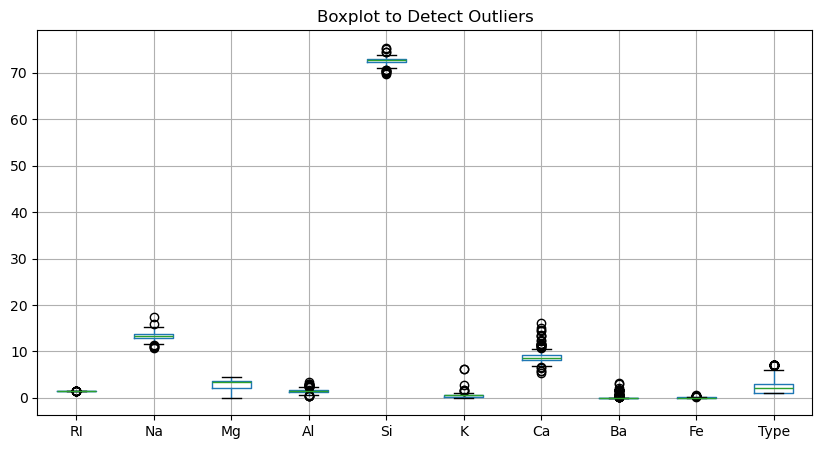

In [10]:
import matplotlib.pyplot as plt
df.boxplot(figsize=(10,5))
plt.title("Boxplot to Detect Outliers")
plt.show()

In [11]:
#Check for Data Inconsistencies
# Duplicates
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 785


In [12]:
# Unique values in target column
print("Unique classes:", df['Type'].unique())

Unique classes: [ 1.  2.  3.  5.  6.  7. nan]


In [13]:
#2: Data Visualization:
#Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
#Analyze any patterns or correlations observed in the data.

In [14]:
import matplotlib.pyplot as plt

In [15]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

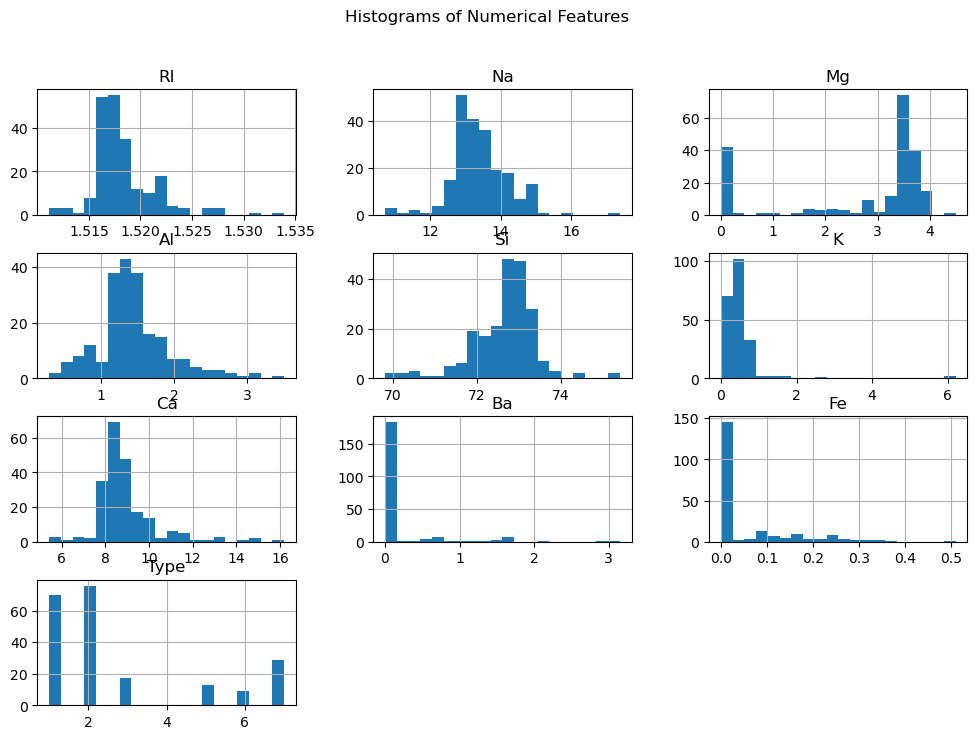

In [16]:
# Histograms
df[numeric_cols].hist(figsize=(12,8), bins=20)
plt.suptitle("Histograms of Numerical Features")
plt.show()

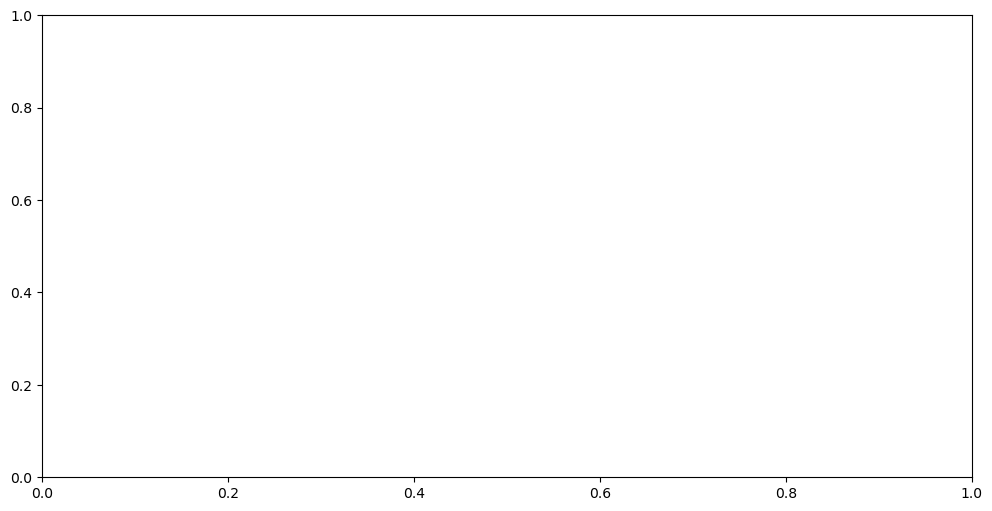

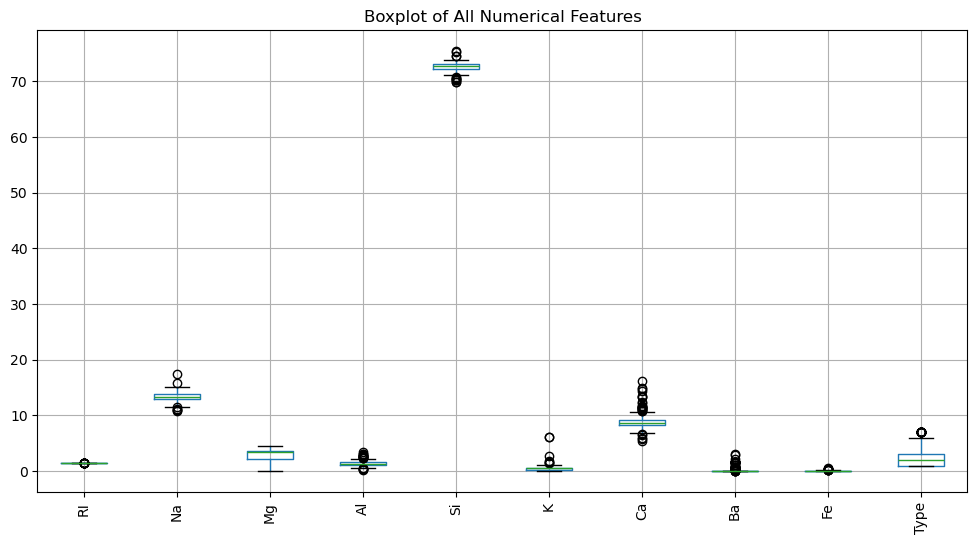

In [18]:
plt.figure(figsize=(12,6))
df[numeric_cols].boxplot()
plt.title("Boxplot of All Numerical Features")
plt.xticks(rotation=90)
plt.show()

In [19]:
print(numeric_cols)

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')


In [20]:
#Bivariate Analysis (Feature vs Target)
#Purpose:
#Understand which features influence the glass type.
#Example plots:
#Box plot of each feature vs target
#Violin plot
#Bar chart for class distribution

In [21]:
import seaborn as sns

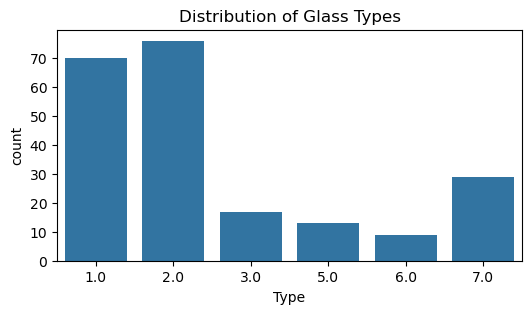

In [23]:
plt.figure(figsize=(6,3))
sns.countplot(x='Type', data=df)
plt.title("Distribution of Glass Types")
plt.show()

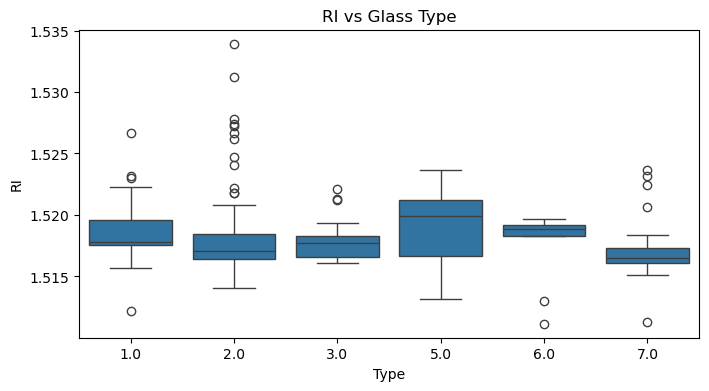

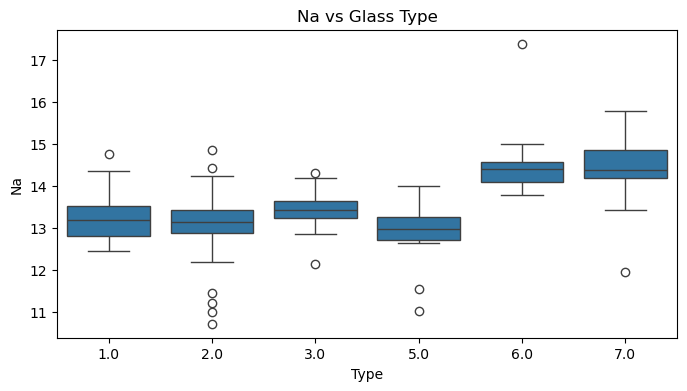

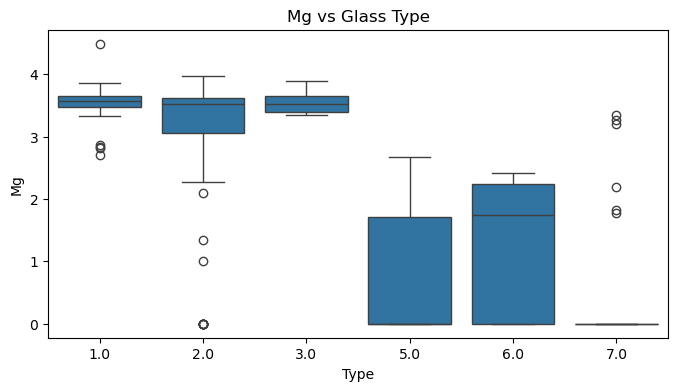

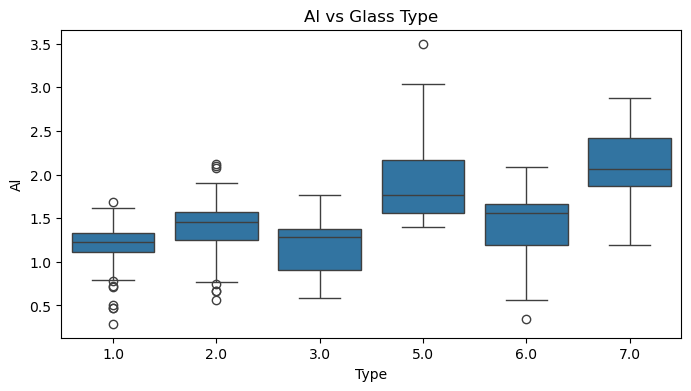

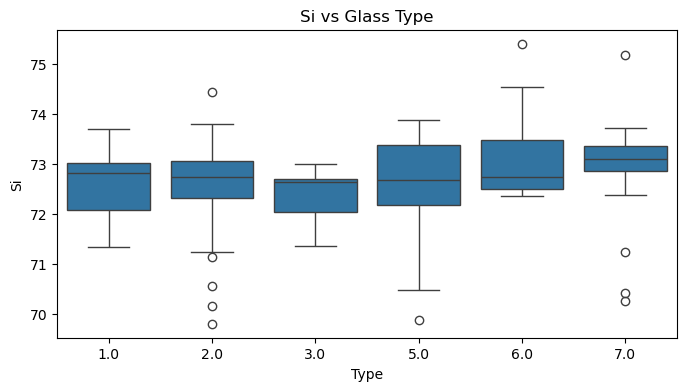

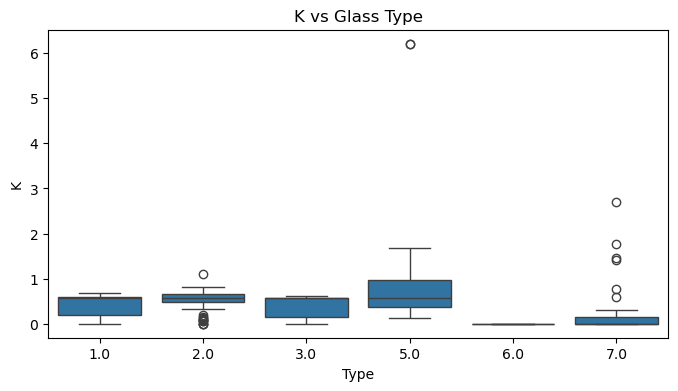

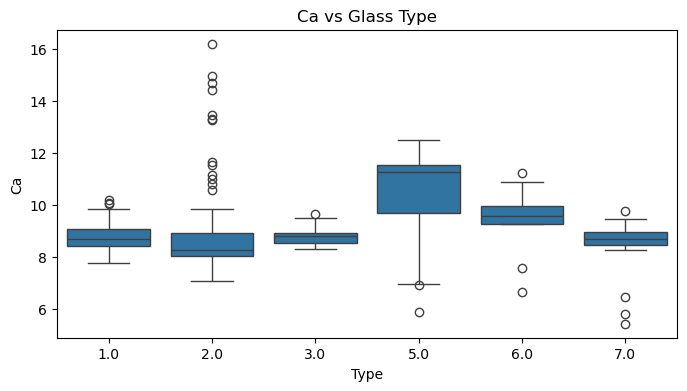

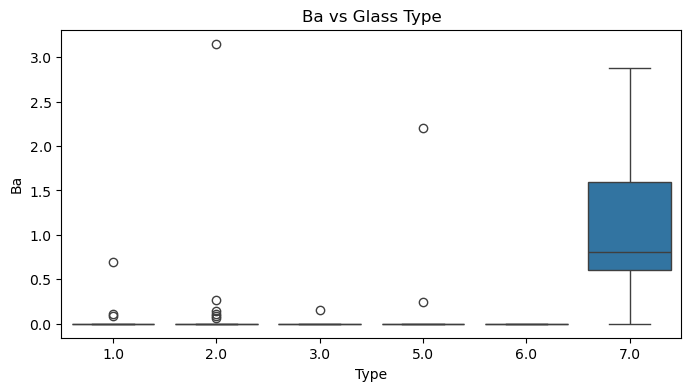

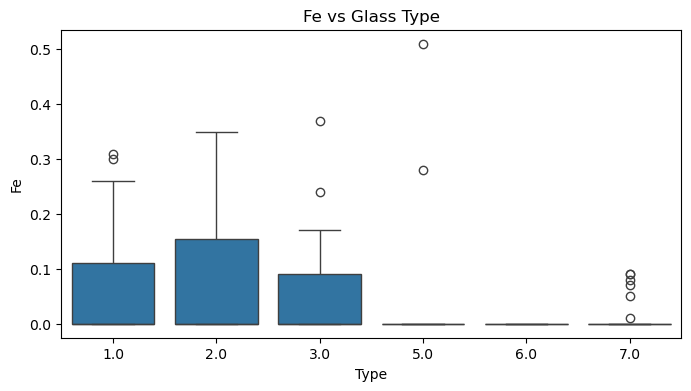

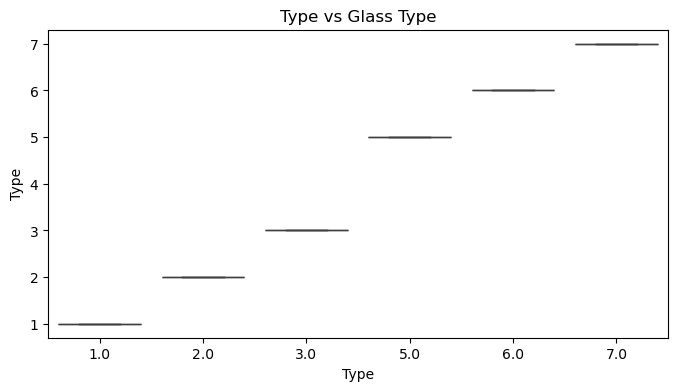

In [27]:
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='Type', y=col, data=df)
    plt.title(f"{col} vs Glass Type")
    plt.show()


In [29]:
# Multivariate Analysis (Relationships Between Features)
# Pair Plot (Scatterplot Matrix)
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
# Ensure numeric_cols is a list
numeric_cols = list(df.select_dtypes(include=['int64', 'float64']).columns)

In [31]:
# Remove Type if it is in numeric list
if 'Type' in numeric_cols:
    numeric_cols.remove('Type')

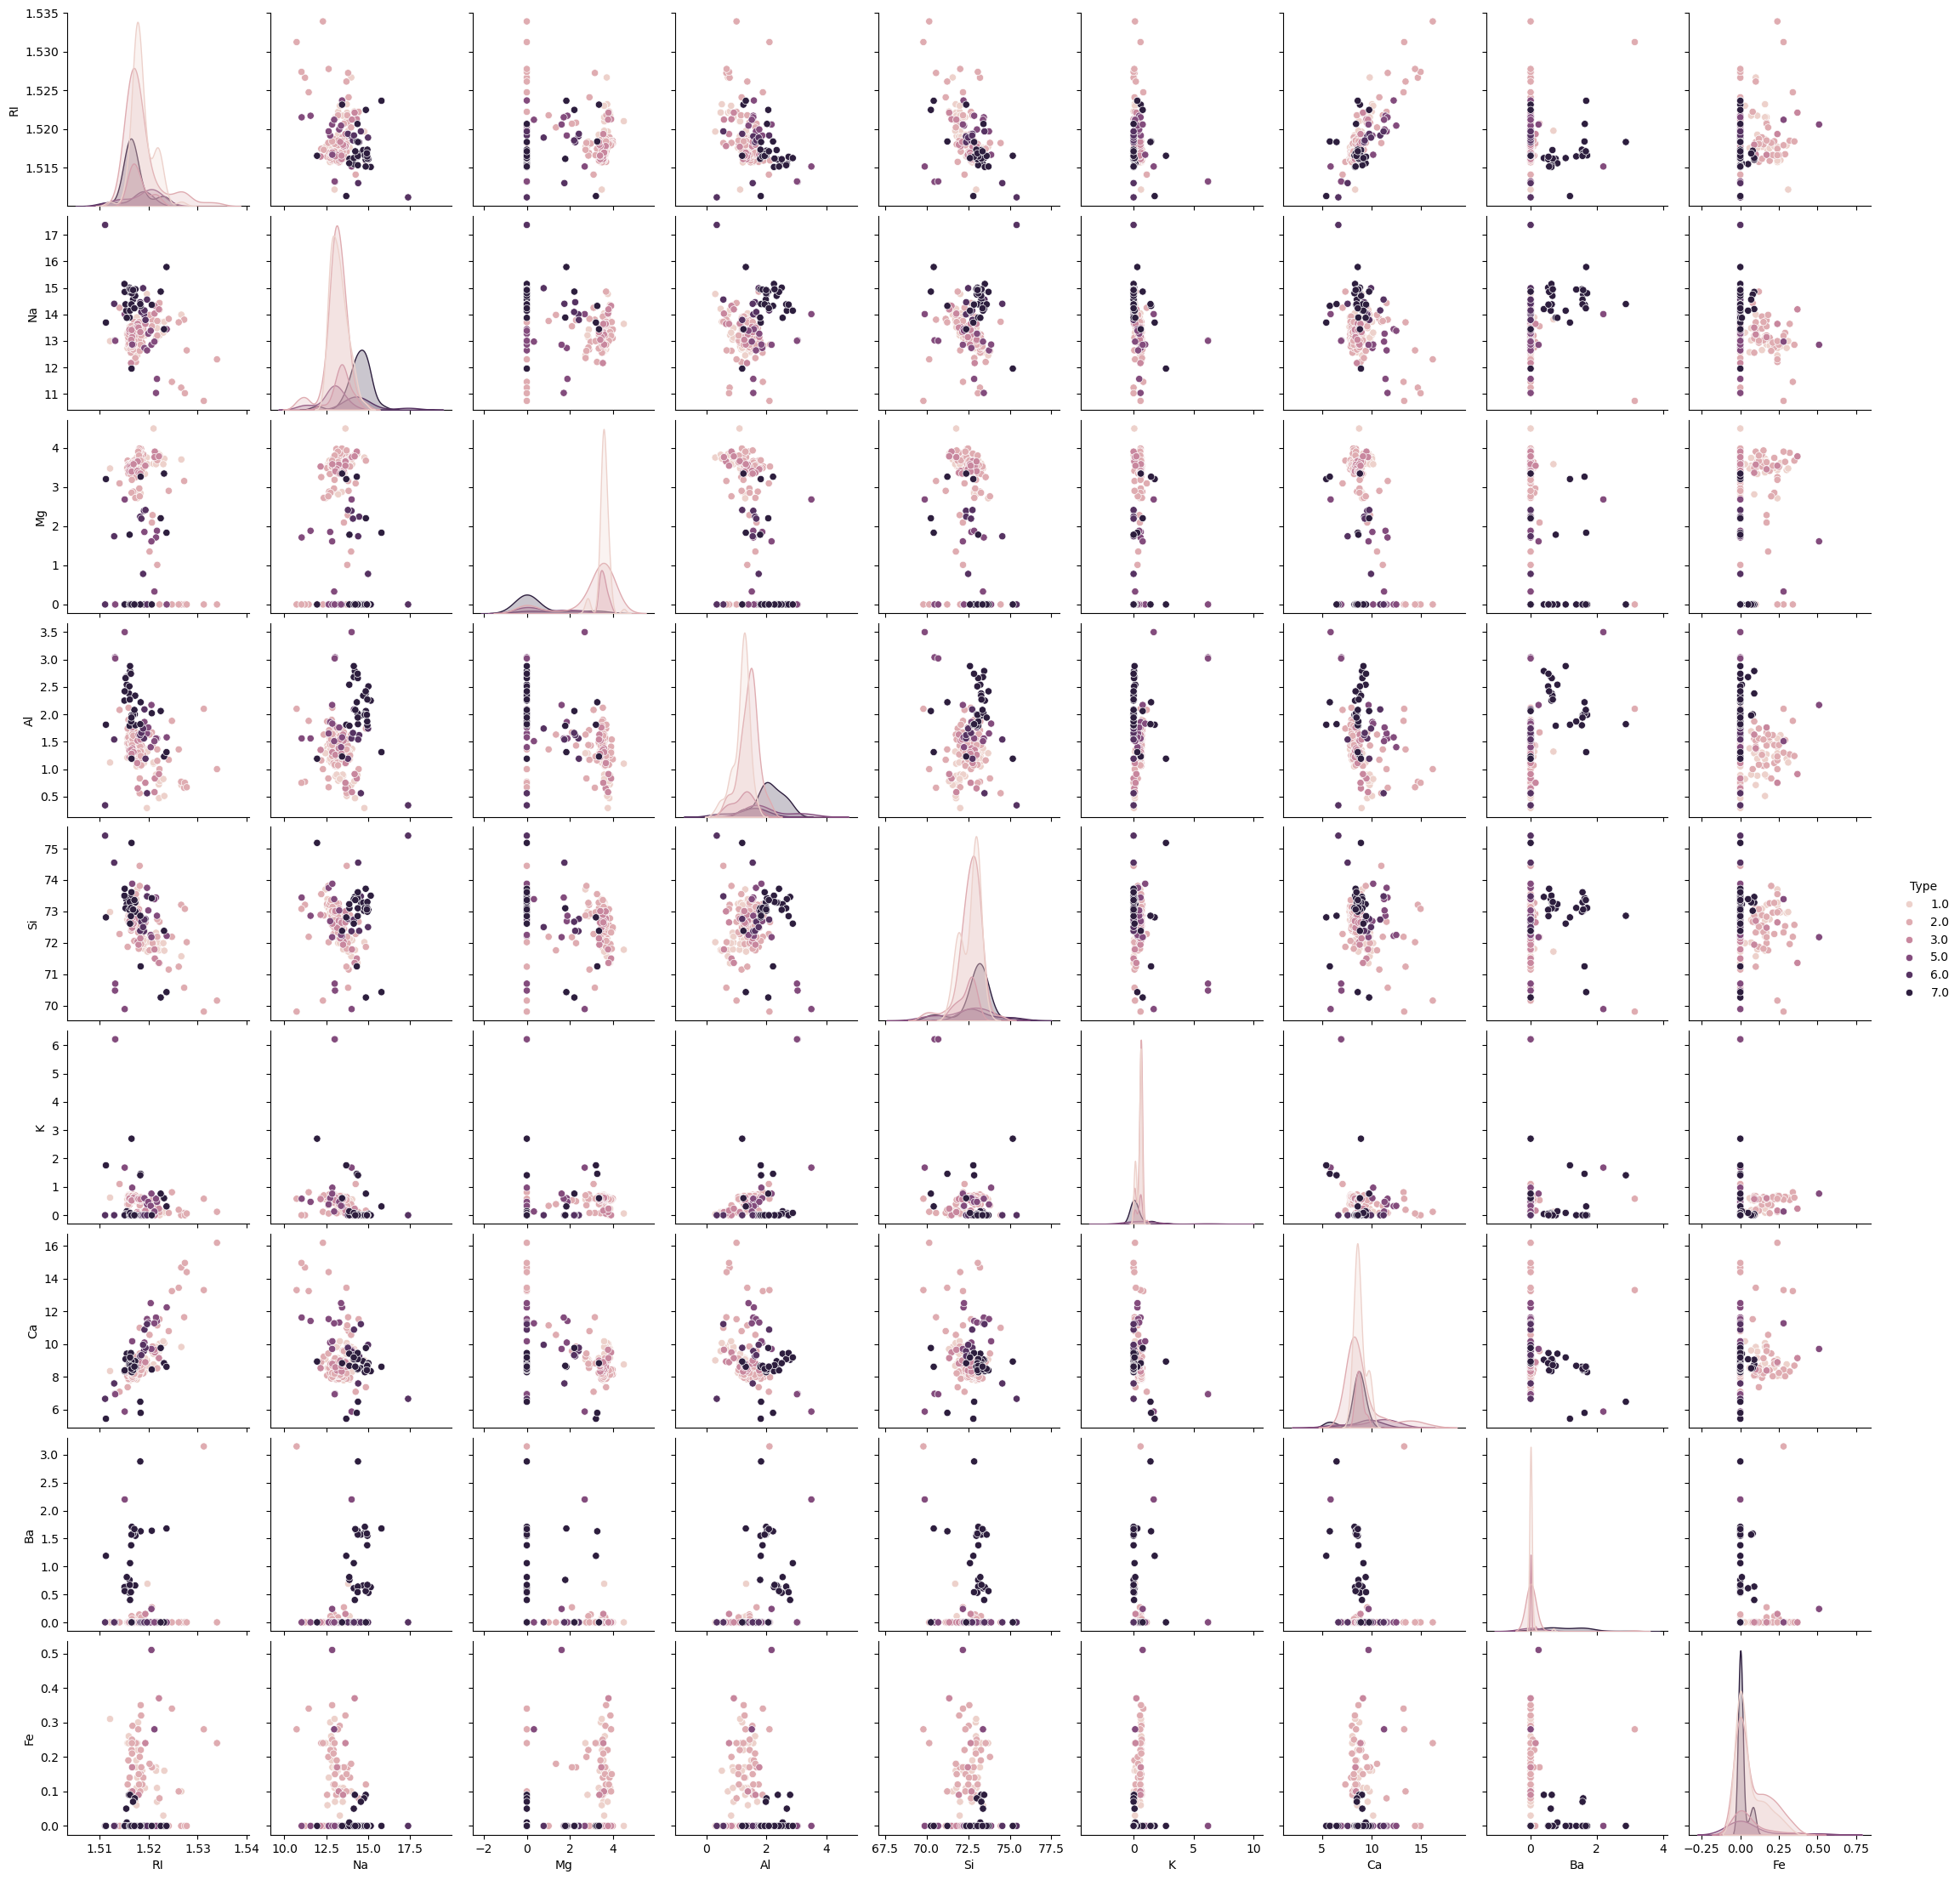

In [32]:
# Pairplot
sns.pairplot(df[numeric_cols + ['Type']], hue='Type')
plt.show()

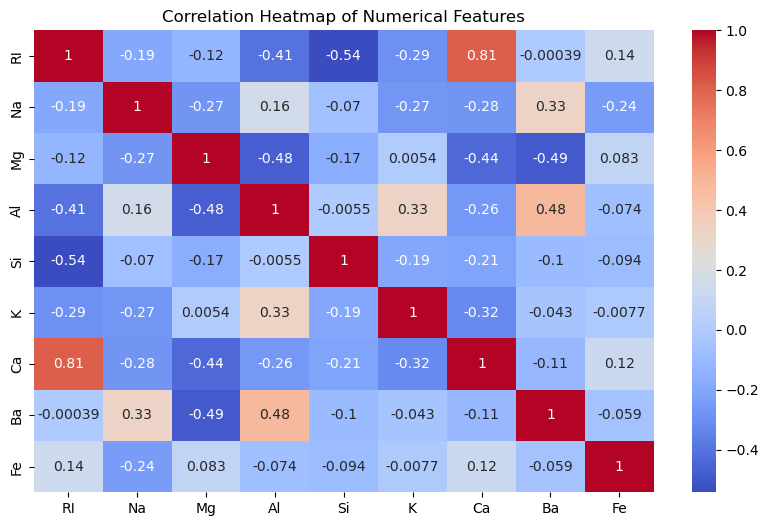

In [34]:
#Correlation Matrix & Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

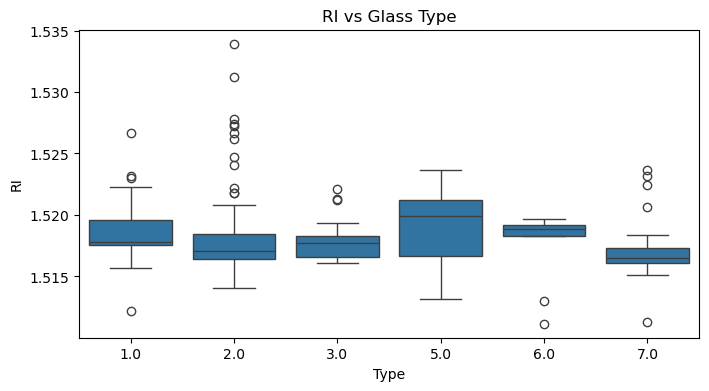

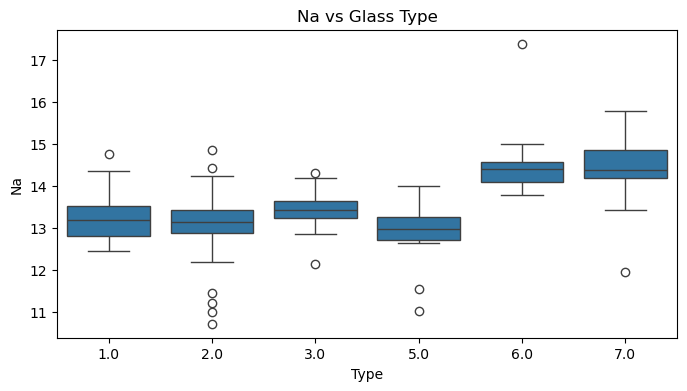

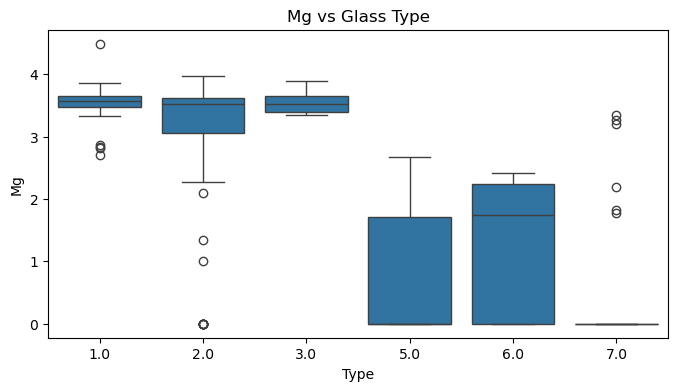

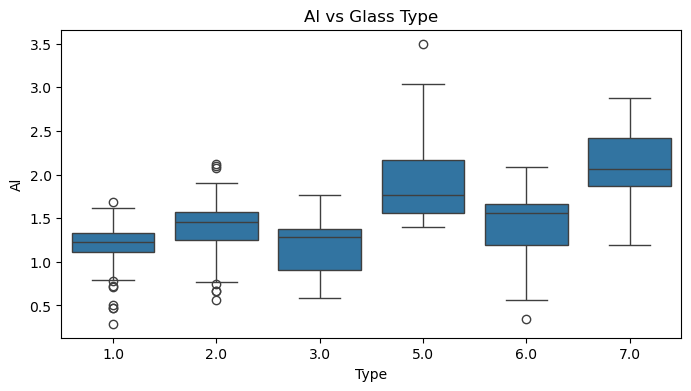

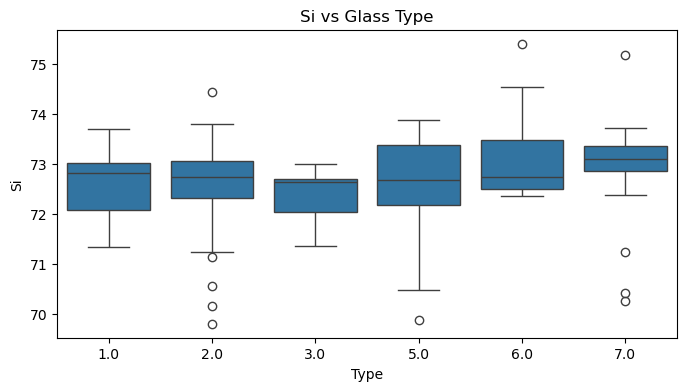

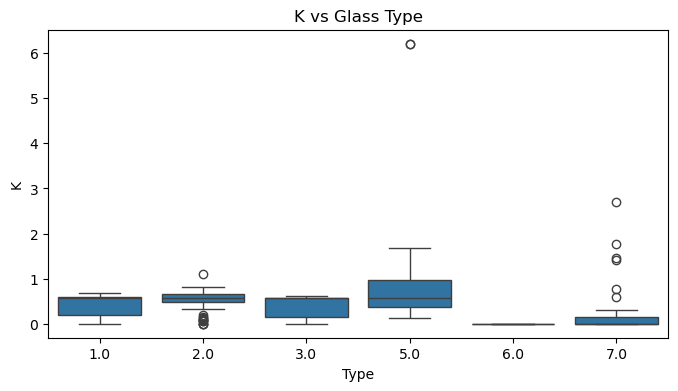

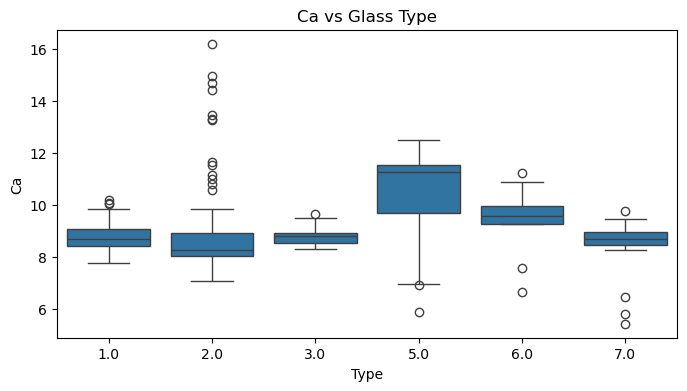

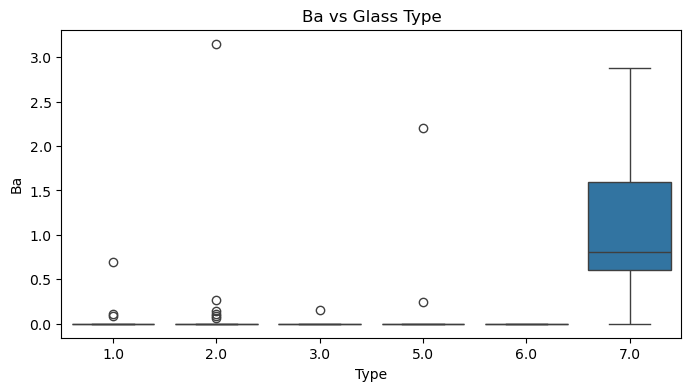

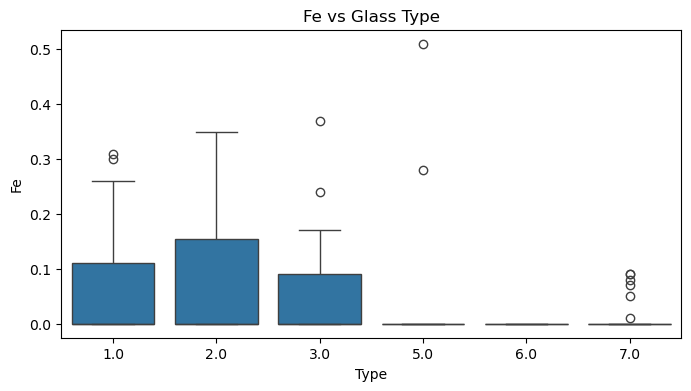

In [35]:
#Pairwise Relationships with Target
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='Type', y=col, data=df)
    plt.title(f"{col} vs Glass Type")
    plt.show()

In [ ]:

#3: Data Preprocessing

#1. Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.
#2. If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.
#3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.

In [36]:
#Handling Missing Values
#Check for Missing Values
df.isnull().sum()

RI      785
Na      785
Mg      785
Al      785
Si      785
K       785
Ca      785
Ba      785
Fe      785
Type    785
dtype: int64

In [37]:
# Percentage of missing values
(df.isnull().mean() * 100).round(2)

RI      78.58
Na      78.58
Mg      78.58
Al      78.58
Si      78.58
K       78.58
Ca      78.58
Ba      78.58
Fe      78.58
Type    78.58
dtype: float64

In [38]:
#Implement Missing Value Imputation (Median)
from sklearn.impute import SimpleImputer

In [39]:
imputer = SimpleImputer(strategy='median')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])
print("Missing values after imputation:\n", df.isnull().sum())

Missing values after imputation:
 RI        0
Na        0
Mg        0
Al        0
Si        0
K         0
Ca        0
Ba        0
Fe        0
Type    785
dtype: int64


In [41]:
#Encoding Categorical Variables
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type    float64
dtype: object

In [42]:
#Apply One-Hot Encoding
categorical_cols = df.select_dtypes(include=['object']).columns

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("Dataset after encoding:\n", df.head())

Dataset after encoding:
         RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0   1.0
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0   1.0
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0   1.0
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0   1.0
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0   1.0


In [43]:
#Glass dataset usually has only numeric features, except sometimes the target variable.
#If the target is categorical, use Label Encoding:
from sklearn.preprocessing import LabelEncoder

In [44]:
le = LabelEncoder()
df['Type'] = le.fit_transform(df['Type'])

In [45]:
#Standardization
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()
X = scaler.fit_transform(df.drop('Type', axis=1))
y = df['Type']

In [47]:
#Handling Imbalanced Data
print("Class Distribution:")
print(y.value_counts())

Class Distribution:
Type
6    785
1     76
0     70
5     29
2     17
3     13
4      9
Name: count, dtype: int64


In [48]:
#Random Oversampling (Simple Method)
from sklearn.utils import resample
import pandas as pd

df_full = pd.concat([pd.DataFrame(X), y.reset_index(drop=True)], axis=1)
df_full.columns = list(df.drop('Type', axis=1).columns) + ['Type']

max_count = df_full['Type'].value_counts().max()
frames = []

for cls, count in df_full['Type'].value_counts().items():
    cls_df = df_full[df_full['Type'] == cls]
    if count < max_count:
        cls_df = resample(cls_df, replace=True, n_samples=max_count, random_state=42)
    frames.append(cls_df)

df_balanced = pd.concat(frames)

In [49]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_bal, y_bal = sm.fit_resample(X, y)

In [50]:
#4: Random Forest Model Implementation
#1. Divide the data into train and test split.
#2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.
#3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.

In [51]:
#RANDOM FOREST MODEL IMPLEMENTATION
#Split the Data into Train & Test Sets

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
# Assuming X (features) and y (target) are already defined after preprocessing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [54]:
X_train.shape

(749, 9)

In [55]:
X_test.shape

(250, 9)

In [56]:
#Build the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [57]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [58]:
# Test predictions
y_pred = rf_model.predict(X_test)

In [59]:
#Model Evaluation
#Evaluate using accuracy, precision, recall, and F1-score.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import pandas as pd

In [60]:
# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

In [61]:
print("📌 Model Performance on Test Data:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

📌 Model Performance on Test Data:
Accuracy: 0.9520
Precision: 0.9559
Recall: 0.9520
F1-Score: 0.9495


In [62]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        18
           1       0.79      0.79      0.79        19
           2       1.00      0.25      0.40         4
           3       1.00      0.67      0.80         3
           4       0.50      0.50      0.50         2
           5       0.75      0.86      0.80         7
           6       1.00      1.00      1.00       197

    accuracy                           0.95       250
   macro avg       0.83      0.71      0.73       250
weighted avg       0.96      0.95      0.95       250



In [63]:
print("\nConfusion Matrix:")
print(pd.DataFrame(confusion_matrix(y_test, y_pred)))


Confusion Matrix:
    0   1  2  3  4  5    6
0  16   2  0  0  0  0    0
1   2  15  0  0  1  1    0
2   3   0  1  0  0  0    0
3   0   1  0  2  0  0    0
4   0   0  0  0  1  1    0
5   0   1  0  0  0  6    0
6   0   0  0  0  0  0  197


In [64]:
#Feature Importance
import matplotlib.pyplot as plt
import seaborn as sns

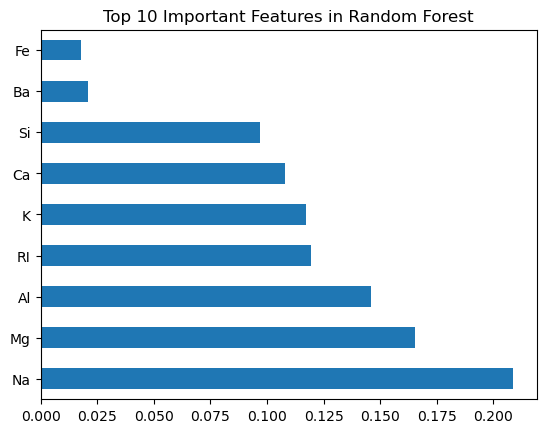

In [65]:
feature_importances = pd.Series(rf_model.feature_importances_, index=df.drop('Type', axis=1).columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features in Random Forest")
plt.show()

In [66]:
#5: Bagging and Boosting Methods
#Apply the Bagging and Boosting methods and compare the results.

In [67]:
#Bagging (Bootstrap Aggregating)
#Uses multiple models trained on random samples of the training data.
#Reduces variance and prevents overfitting.
#Common algorithm: BaggingClassifier with Decision Trees.

In [68]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [69]:
bag_model = BaggingClassifier(n_estimators=100, random_state=42)
bag_model.fit(X_train, y_train)

BaggingClassifier(n_estimators=100, random_state=42)

In [70]:
y_pred_bag = bag_model.predict(X_test)

In [71]:
bag_accuracy = accuracy_score(y_test, y_pred_bag)
bag_precision = precision_score(y_test, y_pred_bag, average='weighted', zero_division=0)
bag_recall = recall_score(y_test, y_pred_bag, average='weighted', zero_division=0)
bag_f1 = f1_score(y_test, y_pred_bag, average='weighted', zero_division=0)

In [72]:
print(" Bagging Model Performance:")
print(f"Accuracy: {bag_accuracy:.4f}")
print(f"Precision: {bag_precision:.4f}")
print(f"Recall: {bag_recall:.4f}")
print(f"F1-Score: {bag_f1:.4f}")

 Bagging Model Performance:
Accuracy: 0.9600
Precision: 0.9607
Recall: 0.9600
F1-Score: 0.9590


In [73]:
#Boosting
#We will implement AdaBoost as required.
from sklearn.ensemble import AdaBoostClassifier

In [74]:
adb_model = AdaBoostClassifier(n_estimators=100, random_state=42)
adb_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [75]:
y_pred_adb = adb_model.predict(X_test)

In [76]:
adb_accuracy = accuracy_score(y_test, y_pred_adb)
adb_precision = precision_score(y_test, y_pred_adb, average='weighted', zero_division=0)
adb_recall = recall_score(y_test, y_pred_adb, average='weighted', zero_division=0)
adb_f1 = f1_score(y_test, y_pred_adb, average='weighted', zero_division=0)

In [77]:
print("\n AdaBoost Model Performance:")
print(f"Accuracy: {adb_accuracy:.4f}")
print(f"Precision: {adb_precision:.4f}")
print(f"Recall: {adb_recall:.4f}")
print(f"F1-Score: {adb_f1:.4f}")


 AdaBoost Model Performance:
Accuracy: 0.9280
Precision: 0.9137
Recall: 0.9280
F1-Score: 0.9194


In [78]:
#Compare Random Forest, Bagging, and Boosting
import pandas as pd

In [79]:
results = pd.DataFrame({
    "Model": ["Random Forest", "Bagging", "AdaBoost"],
    "Accuracy": [accuracy, bag_accuracy, adb_accuracy],
    "Precision": [precision, bag_precision, adb_precision],
    "Recall": [recall, bag_recall, adb_recall],
    "F1-Score": [f1, bag_f1, adb_f1]
})

In [80]:
print("\n Model Comparison:")
print(results)


 Model Comparison:
           Model  Accuracy  Precision  Recall  F1-Score
0  Random Forest     0.952   0.955857   0.952  0.949477
1        Bagging     0.960   0.960688   0.960  0.959019
2       AdaBoost     0.928   0.913734   0.928  0.919405
